In [11]:
#🔹 Concept:

"""
Spectral Clustering converts data into a graph representation using a similarity matrix.

It then computes the Laplacian matrix of the graph.

The eigenvalues of this Laplacian matrix reveal structural information about the graph.

Eigen Gap Heuristic tells you:

Look for the largest jump between consecutive eigenvalues.
The index of the jump = optimal number of clusters.

"""

'\nSpectral Clustering converts data into a graph representation using a similarity matrix.\n\nIt then computes the Laplacian matrix of the graph.\n\nThe eigenvalues of this Laplacian matrix reveal structural information about the graph.\n\nEigen Gap Heuristic tells you:\n\nLook for the largest jump between consecutive eigenvalues.\nThe index of the jump = optimal number of clusters.\n\n'

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# load the dataset
dataset=pd.read_csv("Mall_Customers.csv") 
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
# Select features for clustering
X=dataset.iloc[:, 3:5].values # select features
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [15]:
# Standardized the data (important for distance based methods)
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
X_scaled = scx.fit_transform(X)

In [16]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [33]:
# Eigen Gap Heuristic - to find the number of clustering
from sklearn.metrics.pairwise import rbf_kernel
from scipy.sparse.csgraph import laplacian
from scipy.linalg import eigh

In [35]:
# Compute the similarity matrix
# Adjust the 'gamma' parameter to control the influence of each point.
affinity_matrix = rbf_kernel(X_scaled, gamma=1.0)

In [36]:
affinity_matrix

array([[1.00000000e+00, 7.00498359e-02, 1.93456308e-01, ...,
        2.52570749e-09, 1.96724682e-10, 2.06697318e-11],
       [7.00498359e-02, 1.00000000e+00, 2.07792459e-04, ...,
        1.48631766e-08, 9.65323984e-13, 3.80092190e-10],
       [1.93456308e-01, 2.07792459e-04, 1.00000000e+00, ...,
        2.07713270e-11, 4.38537761e-10, 7.17041886e-14],
       ...,
       [2.52570749e-09, 1.48631766e-08, 2.07713270e-11, ...,
        1.00000000e+00, 7.42729376e-03, 7.42032865e-01],
       [1.96724682e-10, 9.65323984e-13, 4.38537761e-10, ...,
        7.42729376e-03, 1.00000000e+00, 1.71635082e-03],
       [2.06697318e-11, 3.80092190e-10, 7.17041886e-14, ...,
        7.42032865e-01, 1.71635082e-03, 1.00000000e+00]])

In [37]:
#Compute the Laplacian matrix from the similarity matrix
laplacian_matrix, _ = laplacian(affinity_matrix, normed=True, return_diag=True)

In [38]:
#Compute the eigenvalues of the Laplacian matrix
# We only need the smallest few eigenvalues (e.g., first 10)
eigenvalues, eigenvectors= eigh(laplacian_matrix)


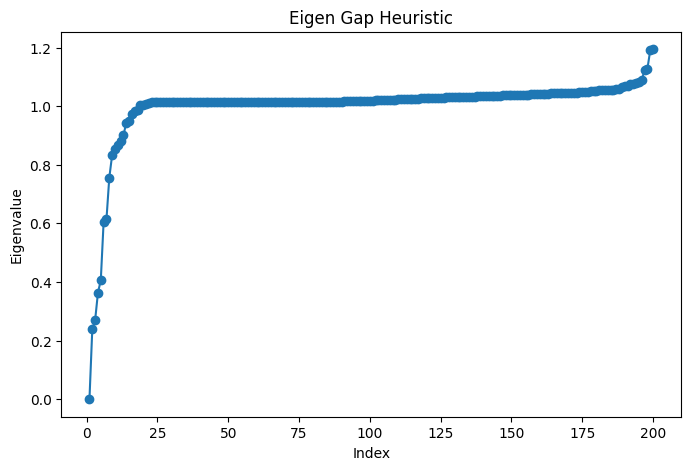

In [45]:
#Plot the first 10 eigenvalues
# Look for the largest jump between two values — that index indicates optimal number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(1,len(eigenvalues)+1), eigenvalues, marker='o')
plt.title("Eigen Gap Heuristic")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")


plt.show()

In [50]:
# # Identify the largest gap
# gaps = np.diff(eigenvalues[:15]) # find differences between consecutive eigenvalues
# optimal_k = np.argmax(gaps)+1 # Add 1 because Python indexing starts from 0

# print(f"Number of Clusters (Eigen Gap Heuristic): {optimal_k}")

In [51]:
"""
Summary:
1. Load and Scale data
2. Compute the similarity matrix (affinity matrix)
3. Compute Laplacian matrix
4. Compute eigenvalues (smallet few)
5. Plot and find biggest jump (gap)
6. Best n_clusters = index of gap + 1

Spectral Clustering Idea:
Spectral Clustering uses the smallest eigenvalues of the Laplacian matrix to reveal the structure of the data (i.e., how many well-separated clusters exist).


"""

'\nSummary:\n1. Load and Scale data\n2. Compute the similarity matrix (affinity matrix)\n3. Compute Laplacian matrix\n4. Compute eigenvalues (smallet few)\n5. Plot and find biggest jump (gap)\n6. Best n_clusters = index of gap + 1\n\nSpectral Clustering Idea:\nSpectral Clustering uses the smallest eigenvalues of the Laplacian matrix to reveal the structure of the data (i.e., how many well-separated clusters exist).\n\n\n'

In [52]:
from sklearn.cluster import SpectralClustering
spectral_model = SpectralClustering(n_clusters=6, affinity='rbf', assign_labels='kmeans', random_state=0)
labels= spectral_model.fit_predict(X_scaled)

C:\Anaconda3\envs\aiml\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [53]:
labels

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 0, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 5, 4, 5, 4,
       0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 1, 1, 1,
       1, 1], dtype=int32)

In [59]:
supervised = dataset

In [60]:
supervised["Cluster_group"] = labels
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


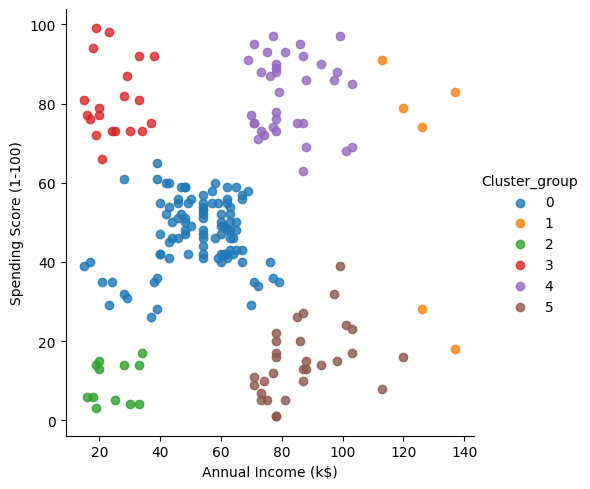

In [61]:
import seaborn as sns
facet=sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],fit_reg=False)